In [27]:
from pytrends.request import TrendReq
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pytrends = TrendReq(hl='en-US')

keywords = ['twitch', 'soundcloud', 'spotify', 'bandcamp', 'discogs']
pytrends.build_payload(keywords, timeframe='today 5-y')

df = pytrends.interest_over_time()
df = df.drop('isPartial', axis=1)
df

,twitch,soundcloud,spotify,bandcamp,discogs
date,,,,,
2016-07-17,20,22,28,2,2
2016-07-24,20,21,28,2,2
2016-07-31,21,22,29,2,2
2016-08-07,22,21,29,2,3
2016-08-14,21,21,30,2,2
...,...,...,...,...,...
2021-06-06,44,9,42,1,2
2021-06-13,41,9,39,1,2
2021-06-20,41,9,40,1,2


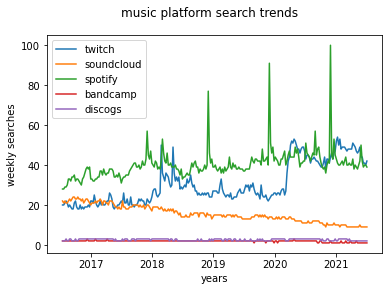

<Figure size 432x288 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt

#plot data
plt.plot(df)

#add titles
plt.suptitle('music platform search trends')
plt.xlabel('years')                       
plt.ylabel('weekly searches')  

#add legend
plt.legend(keywords, loc='upper left')

plt.show()
plt.savefig('best_media.png')

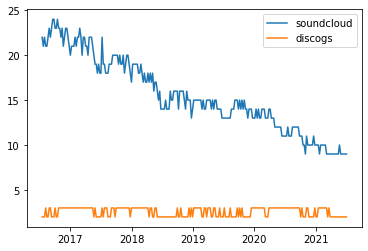

In [29]:
#compare by focus
focus = ['soundcloud', 'discogs'] 

plt.plot(df[focus])
plt.legend(focus)

In [31]:
import pandas as pd

#extract country-level kewords search data
country_df = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)

#get countries with the highest searches of "discogs"
df2 = country_df['discogs'].nlargest(10)

#convert to dataframe
df2 = df2.to_frame()

df2

,discogs
geoName,
Greece,12
Serbia,11
Belgium,8
Croatia,8
Italy,7
Japan,7
Bosnia & Herzegovina,6
Montenegro,6
Slovenia,6


In [32]:
pytrends.build_payload(kw_list=['Discogs'], geo='US-WA')
df2 = pytrends.interest_by_region(resolution='CITY', inc_low_vol=True)
df2.head()

,Discogs
geoName,
Portland OR,13
Seattle-Tacoma WA,100
Spokane WA,42
Yakima-Pasco-Richland-Kennewick WA,42


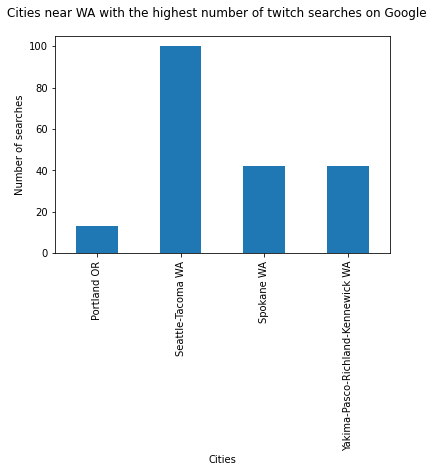

In [25]:
#plot a bar chart
df2.plot(kind='bar', legend=None)

#titles
plt.suptitle('Cities near WA with the highest number of twitch searches on Google')
plt.ylabel('Number of searches')
plt.xlabel('Cities')

plt.show()

In [14]:
df3 = country_df[30:40]
df3

,twitch,soundcloud,spotify,bandcamp,discogs
geoName,,,,,
British Indian Ocean Territory,0,0,0,0,0
British Virgin Islands,13,72,15,0,0
Brunei,29,20,51,0,0
Bulgaria,56,16,25,1,2
Burkina Faso,0,30,70,0,0
Burundi,0,56,44,0,0
Cambodia,27,37,33,2,1
Cameroon,11,41,45,3,0
Canada,35,13,47,3,2


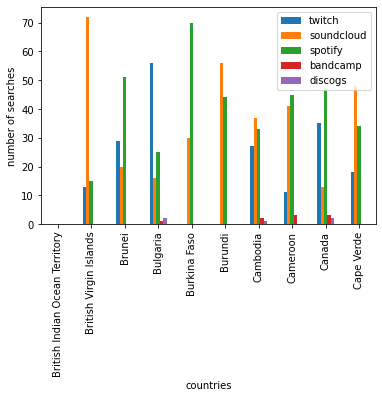

In [15]:
#plot bar chart
df3.plot(kind='bar')

plt.ylabel('number of searches')
plt.xlabel('countries')

plt.show()

In [16]:
df.tail()

,twitch,soundcloud,spotify,bandcamp,discogs
date,,,,,
2021-06-06,44,9,42,1,2
2021-06-13,41,9,39,1,2
2021-06-20,41,9,40,1,2
2021-06-27,40,9,40,1,2
2021-07-04,42,9,39,1,2


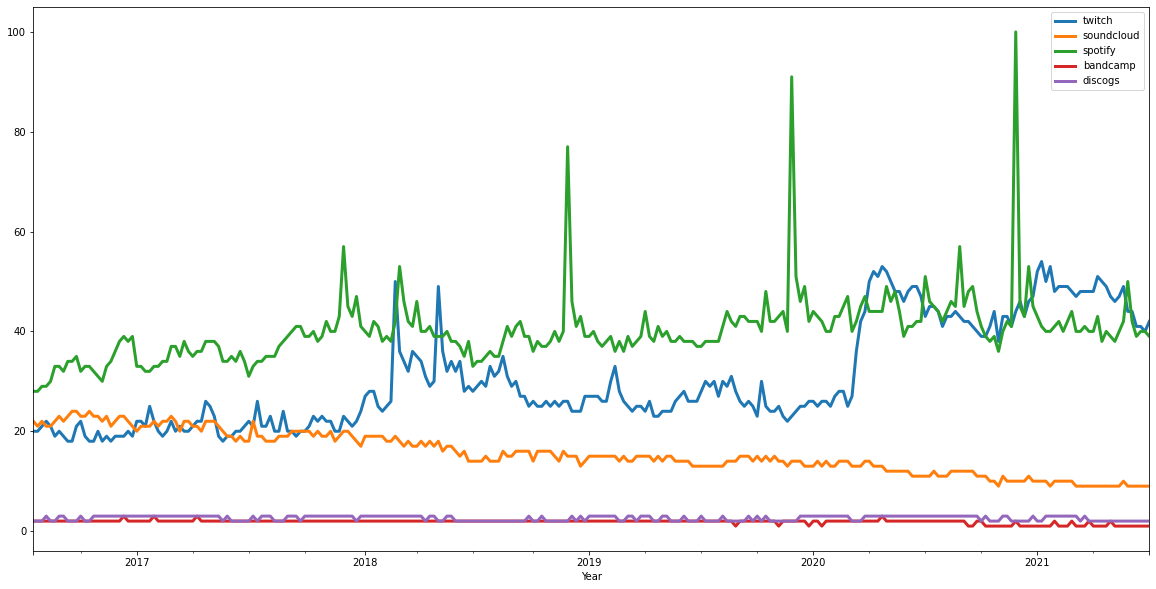

In [17]:
df.plot(figsize=(20, 10), linewidth=3)
plt.xlabel('Year');
plt.savefig("music_services.png")


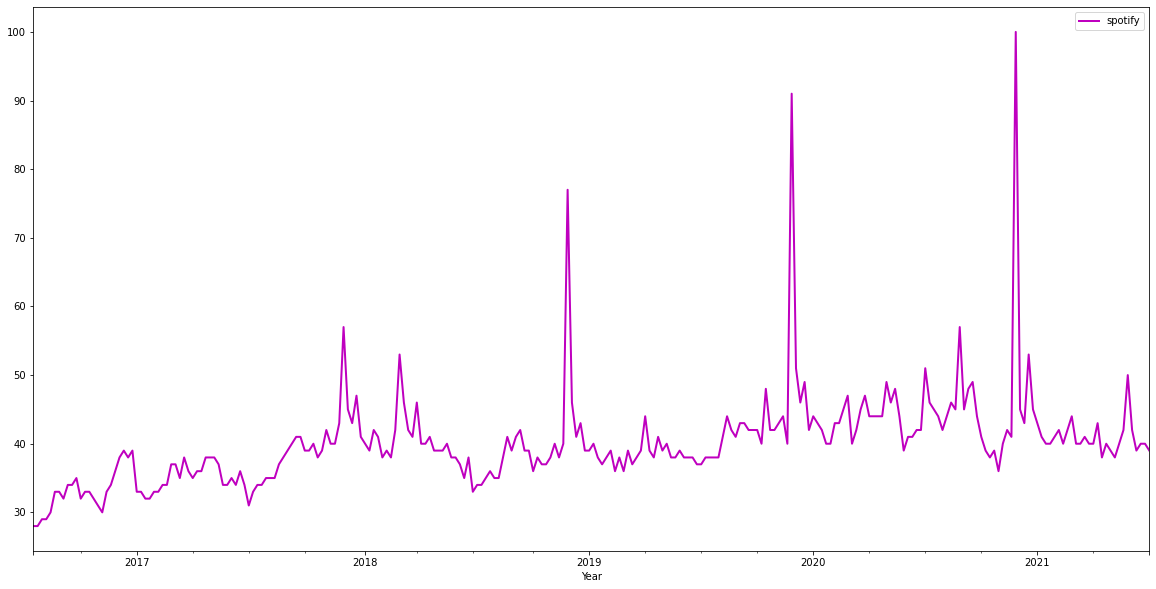

In [18]:
df[['spotify']].plot(figsize=(20, 10), linewidth=2, color='m')
plt.xlabel('Year');

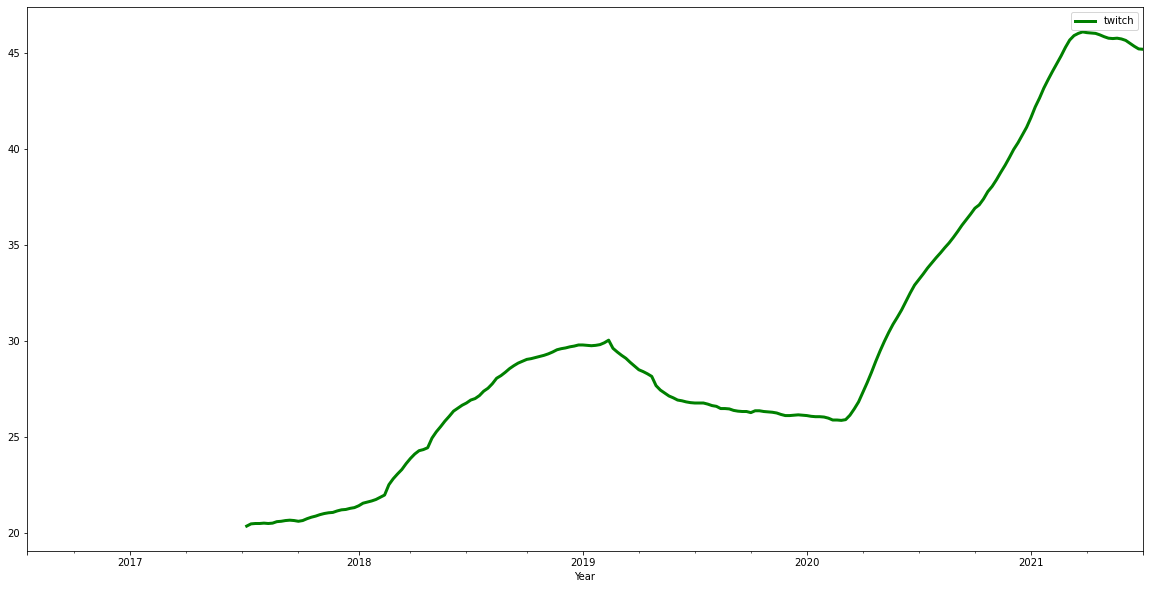

In [19]:
# Identify trends in the time series with the use of rolling average
# for each point calculate the average of the points on either side of it
# Number points is determined by the window size

twitch = df[['twitch']] # use two brackets to extract a dataframe rather than a series
#spotify = df[['spotify']] # use two brackets to extract a dataframe rather than a series


twitch.rolling(52).mean().plot(figsize=(20, 10), linewidth=3, color='g')
#spotify.rolling(52).mean().plot(figsize=(20, 10), linewidth=3, color='g')

plt.xlabel('Year');

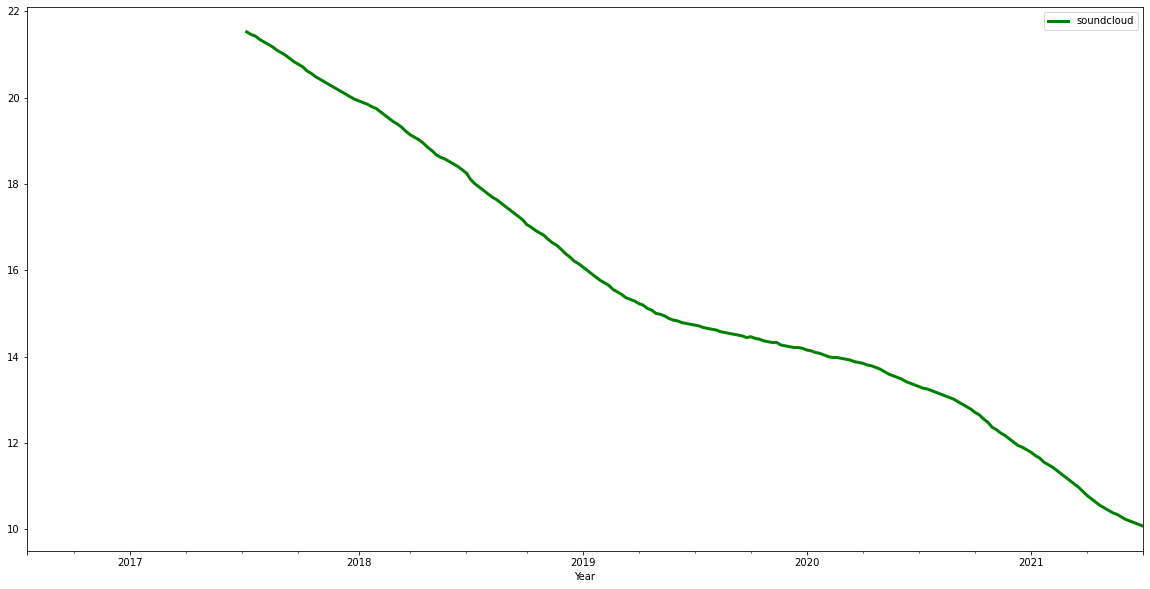

In [20]:
soundcloud = df[['soundcloud']] # use two brackets to extract a dataframe rather than a series

soundcloud.rolling(52).mean().plot(figsize=(20, 10), linewidth=3, color='g')
plt.xlabel('Year');

<AxesSubplot:xlabel='date'>

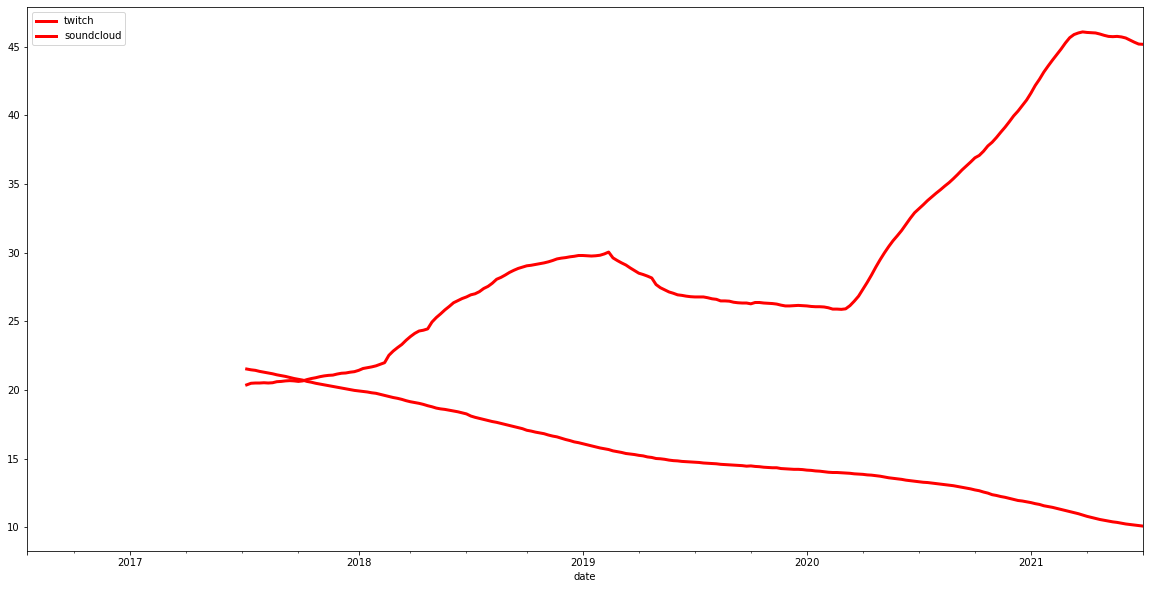

In [21]:
# use pd_concat to concat the columns as a list
df_rm = pd.concat([twitch.rolling(52).mean(), soundcloud.rolling(52).mean()], axis=1)
df_rm.plot(figsize=(20,10), linewidth=3, color='r')


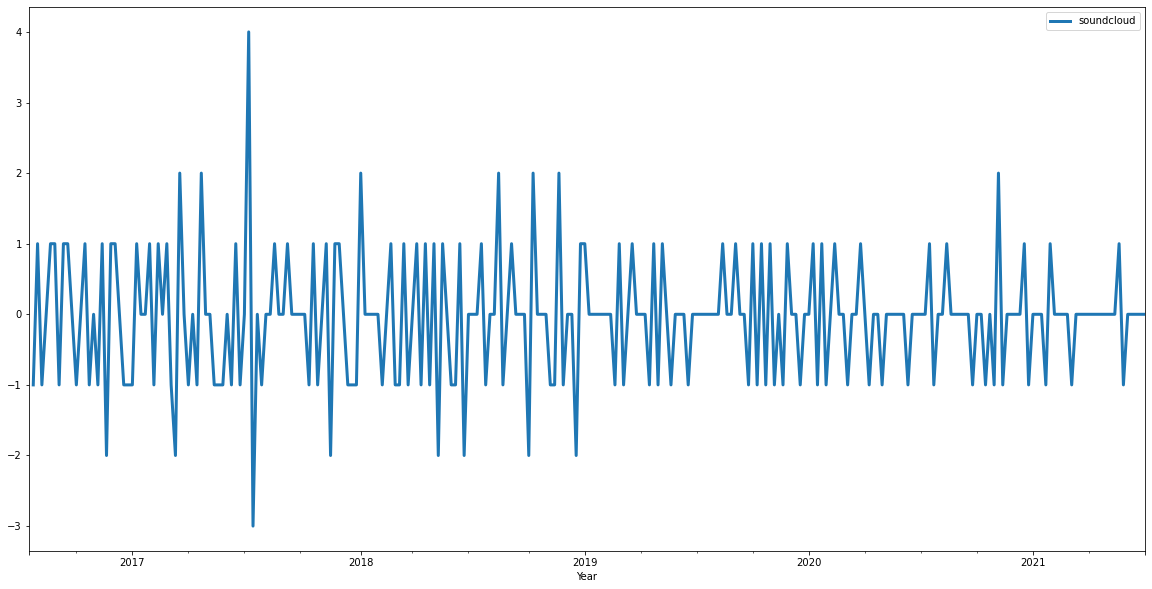

In [22]:
# Use differencing to remove the trend  by stabilizing the mean 
# You are looking at the difference between a data point and the one before it
soundcloud.diff().plot(figsize=(20,10), linewidth=3)
plt.xlabel('Year');

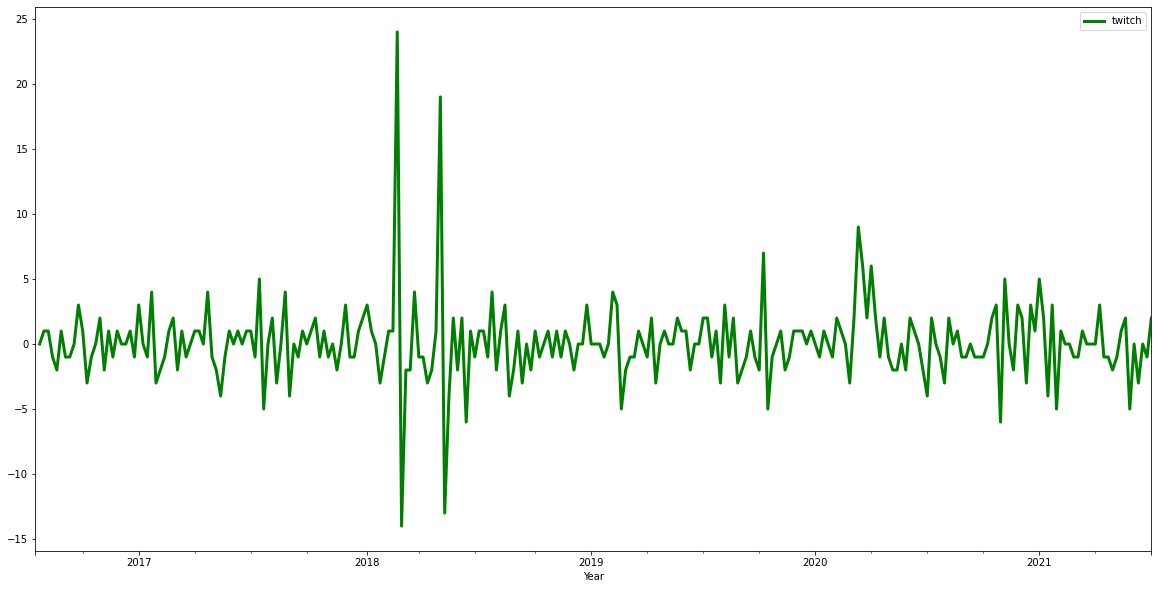

In [23]:
twitch.diff().plot(figsize=(20,10), linewidth=3, color='g')
plt.xlabel('Year');